## Film Trend Analysis for Microsoft's New Movie Studio 

* Student name: Cecily Wahome
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Samuel Karu
* Blog post URL:


## Intoduction

In an evolving landscape where original content reigns supreme, understanding the current cinematic trends that drive box office success is paramount for Microsoft's foray into the movie industry. This analysis delves into the diverse genres and themes that have proven their commercial prowess, offering actionable insights to guide the strategic direction of Microsoft's new movie studio. By examining the recent box office hits, audience preferences, and emerging patterns in storytelling, this exploration aims to illuminate the potential pathways for Microsoft to carve its niche and thrive in this competitive arena.

## Problem Statement
Microsoft plans to launch a new movie studio to compete in the original video content market. However, they lack expertise in film production and need data-driven insights to make informed decisions. This project aims to analyze box office performance and identify key factors contributing to movie success. By leveraging datasets from Box Office Mojo and TMDb, the goal is to determine which genres, budget allocations, and marketing strategies are most effective. These insights will guide Microsoft's content creation strategy, ensuring the new studio produces commercially successful films.

## Main Objective
The main objective of this project  is to identify prevalent  trends and audience preferences across genres, providing strategic direction for Microsoft's new movie studio to create compelling, commercially successful films that resonate with audiences and differentiate the brand in the market.

### Specific Objectives
Certainly! Here are the specific objectives;

1. Identifying  the top-performing genres based on domestic and international gross revenues.
2. Determining  the correlation between budget, popularity, and total gross revenue.
3. Analyzing  audience engagement metrics such as vote count and popularity to understand their impact on box office performance.
4. Create visualizations to effectively communicate key findings and insights to stakeholders.
5. Use these visualizations to support strategic decision-making for the new movie studio.
6. Generating  actionable insights on which genres and types of films to prioritize.
7. To Offer recommendations on optimal budget allocation, marketing strategies, and audience engagement techniques.
8. Suggesting  strategies for Microsoft’s new movie studio to enable them to maximize revenue and market share.

## Notebook Structure
1.Overview

2.Data Understanding

3.Data preparation/Cleaning

5.Data Analysis and Evaluation - Visualizations

6.Conclusion - Recommendations,Limitations,Next Steps.

In [25]:
import pandas as pd 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Understanding 
In this section, we describe the datasets used in the analysis. 
This includes:

#### a). Box Office Mojo Dataset
-  This dataset provides detailed financial information about movies, including domestic and foreign gross revenues.
- Key Columns as shown below include Title , Studio , Domestic gross, Foreign gross and year of the movie release

- **Why I choose this dataset**:
  - **Revenue Insights**: Helps in understanding how movies perform financially both domestically and internationally.
  - **Market Trends**: Provides insights into market trends and the financial success of different genres and studios over time.

#### b). TMDb (The Movie Database) Dataset
-This dataset contains additional details about movies, such as budget, popularity, vote average, vote count, and genres.
The key columns as shown below include title, Genre IDs ,Budget , Popularity, Vote Average, Vote count and release dat

- **Importance of this dataset**:
  - **Additional Features**: Provides essential features that contribute to a movie’s success beyond just revenue, such as budget and audience ratings.
  - **Audience Engagement**: Helps in understanding audience engagement through popularity and vote counts.
  - **Genre Analysis**: Allows for a deeper analysis of genre performance and its impact on a movie’s financial success.

#### Why They Are Important
**Comprehensive Analysis**:
- Combining financial data from Box Office Mojo with detailed movie metadata from TMDb enables a holistic analysis of factors contributing to movie success.
- This comprehensive approach allows for the examination of both revenue-related metrics and audience engagement metrics.

**Predictive Modeling**:
- The datasets provide a rich set of features necessary for building robust predictive models to forecast movie revenues.
- Variables like budget, popularity, and vote count from TMDb, along with revenue data from Box Office Mojo, are critical for understanding and predicting financial performance.

**Strategic Insights**:
- By leveraging these datasets, we can derive actionable insights that help in making informed decisions about movie production, marketing strategies, and genre focus.
- This combined data allows Microsoft’s new movie studio to identify high-potential genres and allocate resources effectively to maximize revenue and audience engagement.

### Conclusion

In conclusion utilizing both the Box Office Mojo and TMDb datasets provides a well-rounded view of movie performance, integrating financial metrics with audience engagement and production details. This combined approach ensures a thorough analysis, enabling data-driven decision-making for Microsoft's new movie studio.

## Data Loading

In [52]:
box_office_data = pd.read_csv(r'C:\Users\USER\Desktop\Phase_1_Project\dsc-phase-1-project-v2-4-master\zippedData\bom.movie_gross.csv.gz')
tmdb_data = pd.read_csv(r'C:\Users\USER\Desktop\Phase_1_Project\dsc-phase-1-project-v2-4-master\zippedData\tmdb.movies.csv.gz')

# Displaying the first few rows of each dataset
print(box_office_data.head())
print(tmdb_data.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 origi

In [53]:
# Checking the Data Types
print("Box Office Data Types:\n", box_office_data.dtypes)
print("TMDb Data Types:\n", tmdb_data.dtypes)

Box Office Data Types:
 title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object
TMDb Data Types:
 Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object


## Data cleaning
Importance:
Data preparation and cleaning are critical steps in ensuring the accuracy, reliability, and validity of the analysis. They help in removing inconsistencies, handling missing values, and ensuring that the data is in a suitable format for analysis.

for data cleaning and prepartions here are some of the activities that took place 

##### 1.Handling Missing Values
This is achieved by 
Dropping  rows with missing 'studio' values in the Box Office Mojo dataset to ensure completeness.
Dropping  rows with missing values in critical columns like 'vote_average', 'vote_count', and 'genres' in the TMDb dataset to maintain data integrity.

##### 2. Converting Data Types
This is important to  ensure that numeric operations can be performed accurately.

It is achieved by Converting  'domestic_gross' and 'foreign_gross' columns from strings to numeric data types by removing currency symbols and commas, and then converting to float.

#### 3. Handling Non-Numeric Data
 Non-numeric data needs to be processed or excluded for certain types of analysis, such as correlation matrices.

achieved by ensuring  that only numeric columns were selected for the correlation analysis to avoid errors and improve model performance.

#### 4. Data Validation
This is important as it ensures the integrity and accuracy of the dataset after cleaning and merging.
achieved by checking  for duplicates and inconsistencies to maintain data quality.

In [54]:
# Checking for any missing values
print(box_office_data.isnull().sum())
print(tmdb_data.isnull().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [55]:
# checking to see the columns in both DataFrames
print("Box Office Data Columns: ", box_office_data.columns)
print("TMDb Data Columns: ", tmdb_data.columns)

Box Office Data Columns:  Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
TMDb Data Columns:  Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [56]:
# Dropping rows with missing values 
box_office_data.dropna(subset=['domestic_gross', 'foreign_gross', 'title'], inplace=True)

# Check available columns in TMDb data
print("TMDb Data Columns: ", tmdb_data.columns)

# Assuming 'vote_average', 'vote_count', and 'genres' are present after inspection
if 'vote_average' in tmdb_data.columns and 'vote_count' in tmdb_data.columns and 'genres' in tmdb_data.columns:
    tmdb_data.dropna(subset=['vote_average', 'vote_count', 'genres'], inplace=True)
else:
    print("One or more required columns are missing in TMDb data.")


TMDb Data Columns:  Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
One or more required columns are missing in TMDb data.


In [57]:
#ensuring there are no missing values
print("Box Office Data Missing Values:\n", box_office_data.isnull().sum())
print("TMDb Data Missing Values:\n", tmdb_data.isnull().sum())


Box Office Data Missing Values:
 title             0
studio            2
domestic_gross    0
foreign_gross     0
year              0
dtype: int64
TMDb Data Missing Values:
 Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [59]:
# Dropping rows with missing 'studio' values
box_office_data.dropna(subset=['studio'], inplace=True)

In [60]:
# rechecking there are no missing values
print("Box Office Data Missing Values:\n", box_office_data.isnull().sum())
print("TMDb Data Missing Values:\n", tmdb_data.isnull().sum())

Box Office Data Missing Values:
 title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64
TMDb Data Missing Values:
 Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [61]:
 #Checking for Duplicates
print("Box Office Data Duplicates:\n", box_office_data.duplicated().sum())
print("TMDb Data Duplicates:\n", tmdb_data.duplicated().sum())

Box Office Data Duplicates:
 0
TMDb Data Duplicates:
 0


In [62]:
#reviewing summary statistics for numerical columns to spot any anomalies.
print("Box Office Data Summary:\n", box_office_data.describe())
print("TMDb Data Summary:\n", tmdb_data.describe())


Box Office Data Summary:
        domestic_gross         year
count    2.007000e+03  2007.000000
mean     4.701984e+07  2013.506228
std      8.162689e+07     2.597997
min      4.000000e+02  2010.000000
25%      6.700000e+05  2011.000000
50%      1.670000e+07  2013.000000
75%      5.605000e+07  2016.000000
max      9.367000e+08  2018.000000
TMDb Data Summary:
         Unnamed: 0             id    popularity  vote_average    vote_count
count  26517.00000   26517.000000  26517.000000  26517.000000  26517.000000
mean   13258.00000  295050.153260      3.130912      5.991281    194.224837
std     7654.94288  153661.615648      4.355229      1.852946    960.961095
min        0.00000      27.000000      0.600000      0.000000      1.000000
25%     6629.00000  157851.000000      0.600000      5.000000      2.000000
50%    13258.00000  309581.000000      1.374000      6.000000      5.000000
75%    19887.00000  419542.000000      3.694000      7.000000     28.000000
max    26516.00000  608444.0000

In [63]:
# Converting gross columns to numeric
box_office_data['domestic_gross'] = box_office_data['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
box_office_data['foreign_gross'] = box_office_data['foreign_gross'].replace('[\$,]', '', regex=True).astype(float)


## Merging Data
-Merging  datasets is important as it  allows for a comprehensive analysis that leverages data from both sources.

-this is achieved by 
Merging  Box Office Mojo and TMDb datasets on the 'title' column, ensuring a unified dataset for analysis.

- After merging Validation  is done on the merged data to confirm the presence of all necessary columns and the correctness of the join.


In [37]:
# Merging the datasets on the title
merged_data = pd.merge(box_office_data, tmdb_data, left_on='title', right_on='title')
merged_data['total_gross'] = merged_data['domestic_gross'] + merged_data['foreign_gross']

In [38]:
#Confirm merging is successful
print("Shape of box_office_data:", box_office_data.shape)
print("Shape of tmdb_data:", tmdb_data.shape)
print("Shape of merged_data:", merged_data.shape)

print("Missing values in merged_data:\n", merged_data.isnull().sum())
print("First few rows of merged_data:\n", merged_data.head())
print("Columns in merged_data:\n", merged_data.columns)
print("Random sample of merged_data:\n", merged_data.sample(5))

Shape of box_office_data: (2007, 5)
Shape of tmdb_data: (26517, 10)
Shape of merged_data: (1701, 15)
Missing values in merged_data:
 title                0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
vote_count           0
total_gross          0
dtype: int64
First few rows of merged_data:
                         title studio  domestic_gross  foreign_gross  year  \
0                 Toy Story 3     BV     415000000.0    652000000.0  2010   
1                   Inception     WB     292600000.0    535700000.0  2010   
2         Shrek Forever After   P/DW     238700000.0    513900000.0  2010   
3  The Twilight Saga: Eclipse   Sum.     300500000.0    398000000.0  2010   
4                  Iron Man 2   Par.     312400000.0    311500000.0  2010   

   Unnamed: 0 

## Data Analysis
In the data analysis section, we perform detailed exploratory data analysis (EDA) to extract insights and identify patterns that will guide decision-making for Microsoft's new movie studio.
Here below are the steps that are taken 
1. Feature Importance
2. genre analysis

#### Feature Importance
 A Correlation Matrix is used 
The Purpose is to identify relationships between different numerical variables.
The method used is computing  a correlation matrix to find how variables like domestic gross, foreign gross, budget, popularity, and vote average relate to total gross.
Visualization tool here is a  Heatmap.

Insights from the heatmap - High correlation between domestic gross and total gross indicates that domestic performance is a strong predictor of overall success.
This suggests focusing on strategies that enhance domestic market performance.

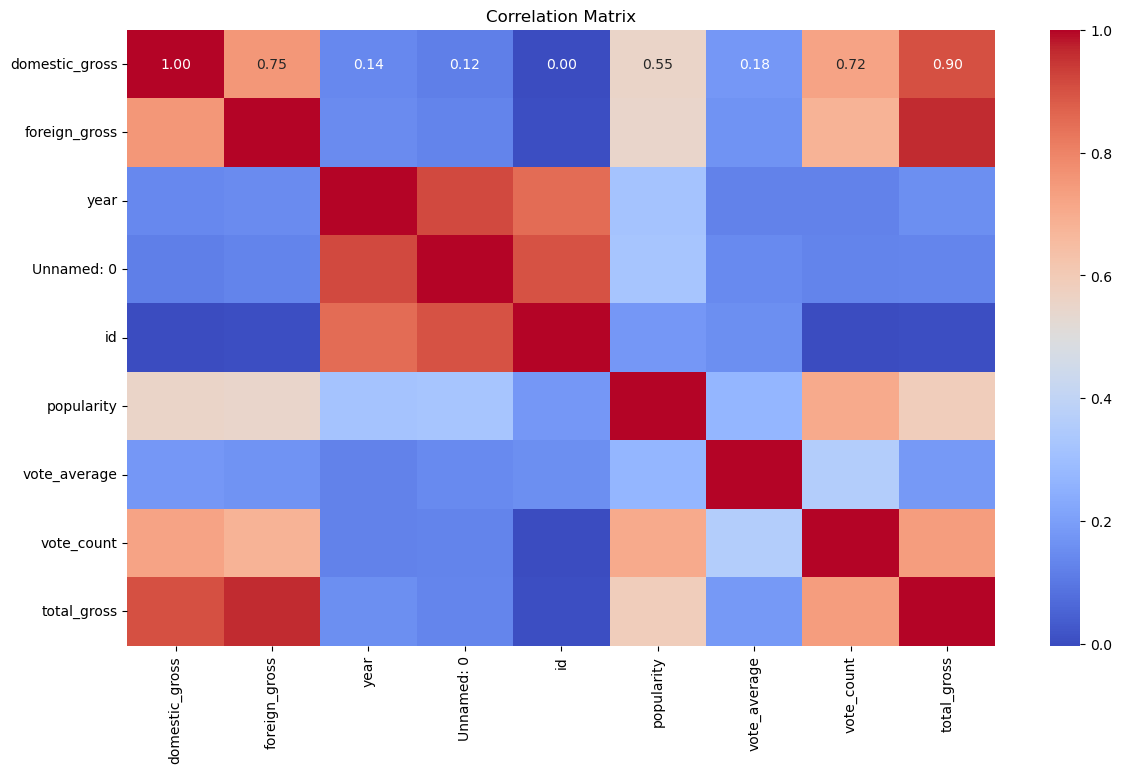

In [64]:
numeric_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr = merged_data[numeric_cols].corr()

# Generate a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Genre Analysis  
- The Purpose is to identify which genres are the most profitable.
- The method used is  calculate the average gross by genre and visualize using bar plots.

Insights from the bar plot below - Adventure and Animation genres lead in average gross revenue, indicating high market demand and profitability.

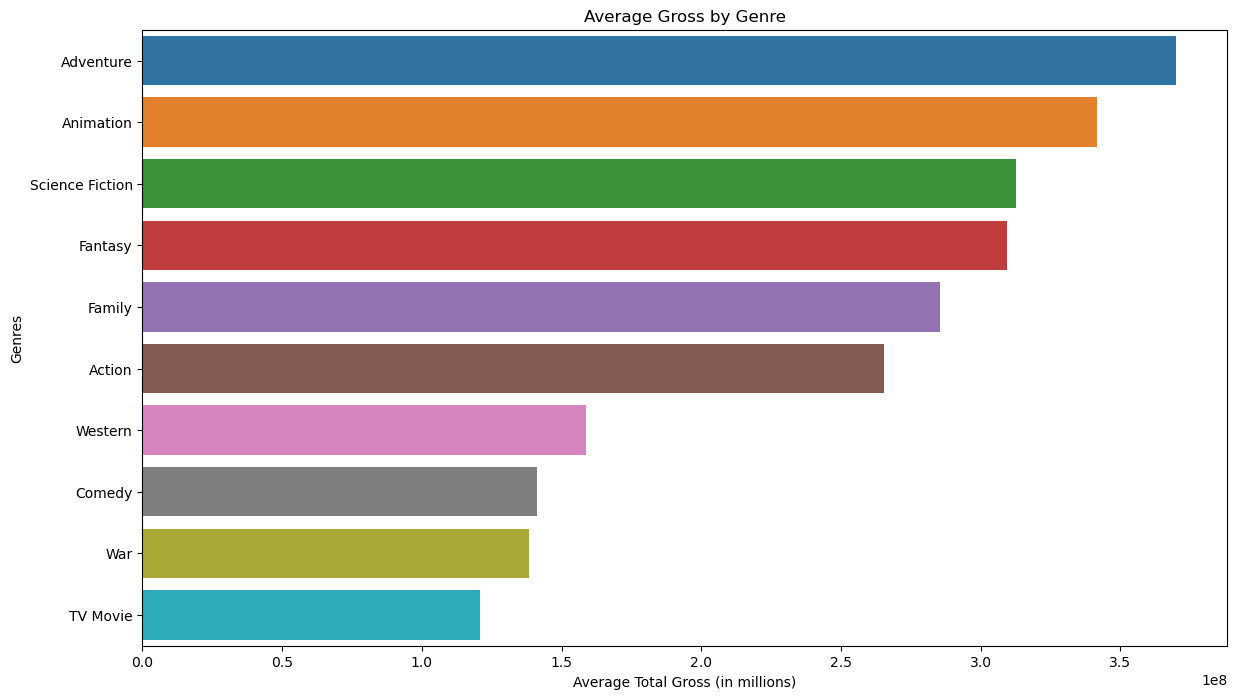

In [39]:
#Doing a genre analysis
# Explode genre_ids and calculate average gross by genre
merged_data['genres'] = merged_data['genre_ids'].apply(lambda x: eval(x) if isinstance(x, str) else [])
genre_gross = merged_data.explode('genres')
genre_gross = genre_gross.groupby('genres')['total_gross'].mean().sort_values(ascending=False).reset_index()

# Map genre IDs to names
genre_mapping = {28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 
                 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 
                 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 
                 10752: 'War', 37: 'Western'}
genre_gross['genres'] = genre_gross['genres'].map(genre_mapping)

# Visualization: Average Gross by Genre
plt.figure(figsize=(14, 8))
sns.barplot(x='total_gross', y='genres', data=genre_gross.head(10))
plt.title('Average Gross by Genre')
plt.xlabel('Average Total Gross (in millions)')
plt.ylabel('Genres')
plt.show()


## Data Vizualization
Data visualization is crucial in data analysis as it helps to understand trends, patterns, and outliers by presenting data graphically. For this project, several types of visualizations are used to extract and communicate insights effectively.

### Top Performing movies by Gross
The purpose of this plotting is Identifying the top-performing movies by gross revenue and by this helping us understand the factors contributing to their success and provides benchmarks for future productions.

Why it is Important 
- Analyzing the highest-grossing movies allows the studio to identify successful patterns and set benchmarks for new productions
- Understanding which genres, budgets, and marketing strategies are common among top-grossing films helps in making informed decisions.
- By studying top performers, the studio can strategize resource allocation, such as focusing on specific genres or increasing marketing budgets.
- Insights into what types of movies resonate most with audiences can guide content creation to maximize audience engagement and box office performance.

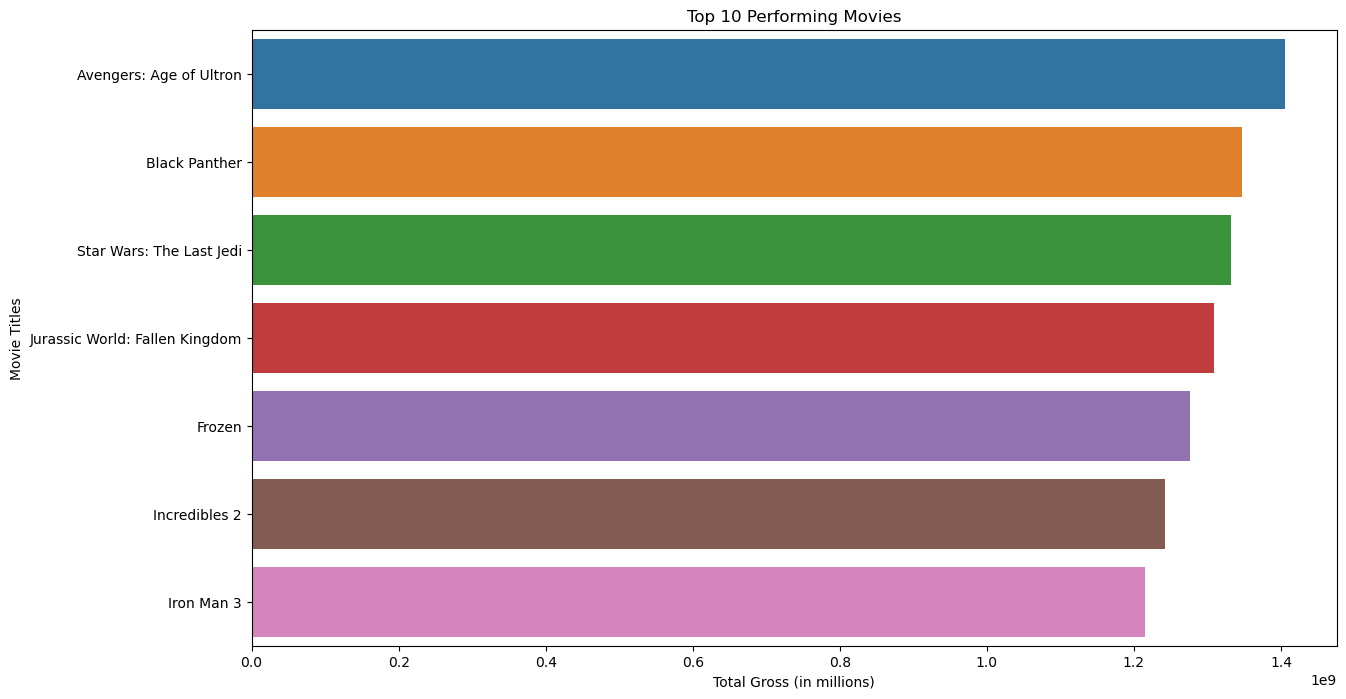

In [40]:
# Top 10 performing movies by total gross
top_movies = merged_data.sort_values(by='total_gross', ascending=False).head(10)

# Visualization: Top 10 Performing Movies
plt.figure(figsize=(14, 8))
sns.barplot(x='total_gross', y='title', data=top_movies)
plt.title('Top 10 Performing Movies')
plt.xlabel('Total Gross (in millions)')
plt.ylabel('Movie Titles')
plt.show()


### Scatter plot of vote average vs. total gross
The Purpose -to explore the relationship between a movie's average viewer rating (vote average) and its total gross revenue.

Importance to this problem solving 
1. Audience Reception - Helps understand how critical acclaim (measured by vote average) impacts a movie’s financial success.

2. Quality vs. Revenue
Identifies whether higher-rated movies tend to generate more revenue, providing insights into the importance of quality and audience satisfaction.

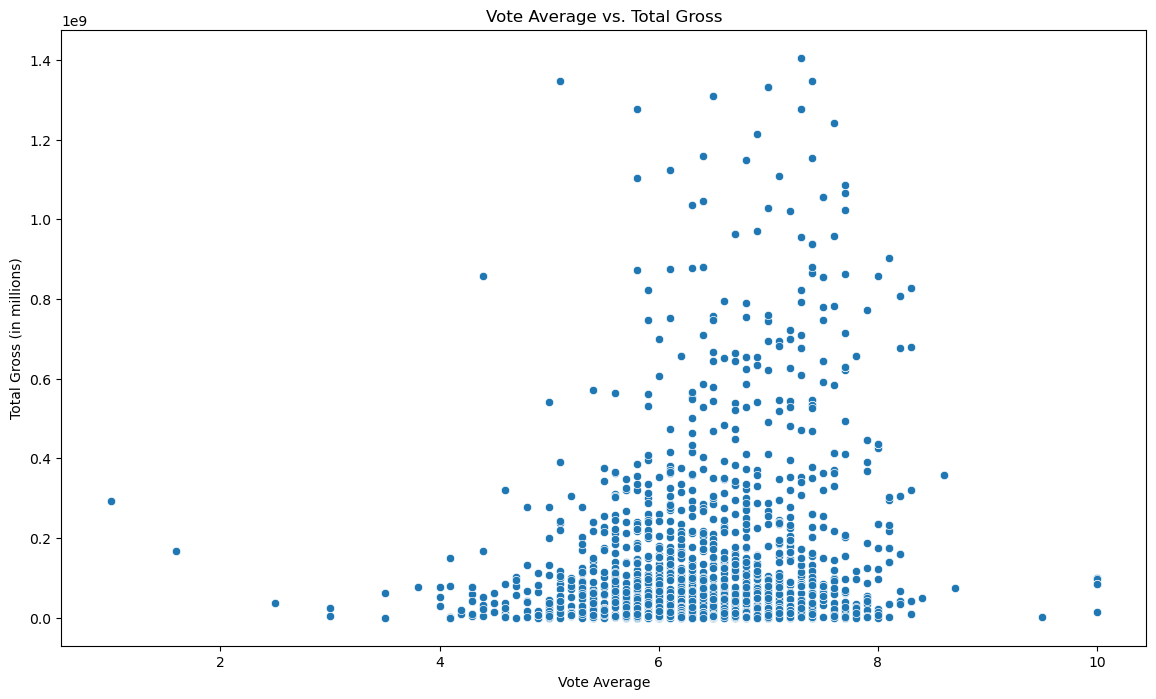

In [41]:
# Scatter plot of vote average vs. total gross
plt.figure(figsize=(14, 8))
sns.scatterplot(x='vote_average', y='total_gross', data=merged_data)
plt.title('Vote Average vs. Total Gross')
plt.xlabel('Vote Average')
plt.ylabel('Total Gross (in millions)')
plt.show()


### Scatter plot of popularity vs. total gross
Insights:
The scatter plot shows whether higher popularity scores correlate with higher total gross revenues.
It helps identify trends and outliers, such as highly popular movies that underperform financially or less popular movies that achieve high gross revenues.


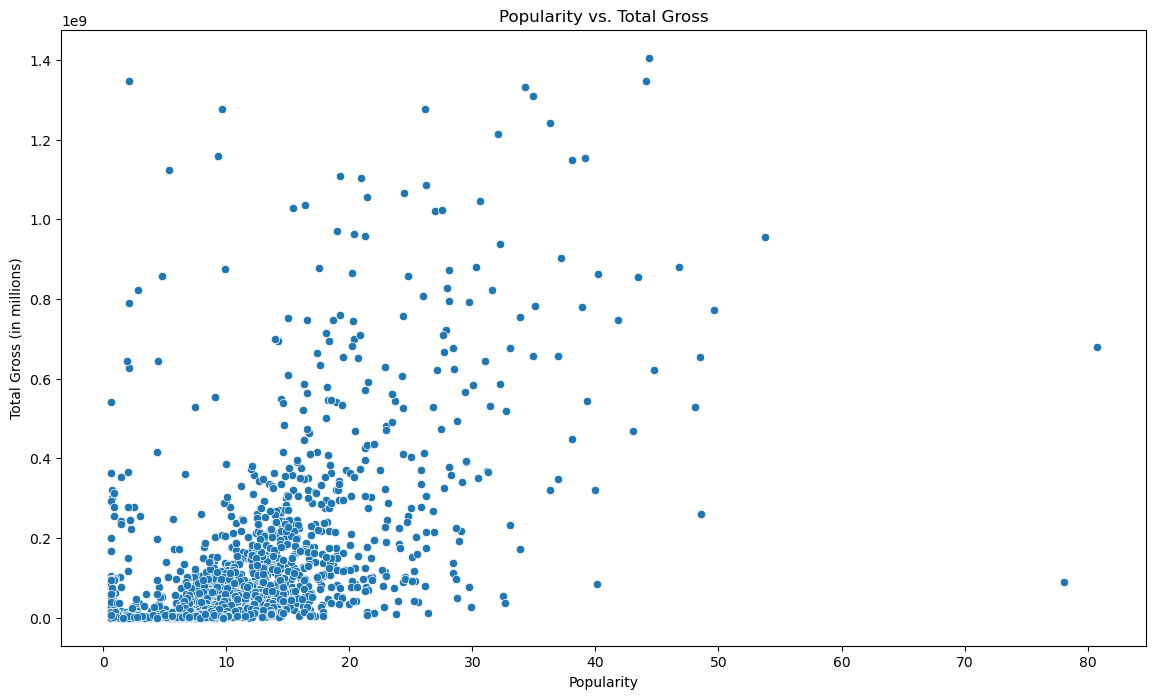

In [42]:
# Scatter plot of popularity vs. total gross
plt.figure(figsize=(14, 8))
sns.scatterplot(x='popularity', y='total_gross', data=merged_data)
plt.title('Popularity vs. Total Gross')
plt.xlabel('Popularity')
plt.ylabel('Total Gross (in millions)')
plt.show()


## Insights and Recommendations
### Insights
From the analysis these are some of the insights 

**On genre performance**
Adventure and Animation took the  lead in average gross revenue, suggesting high market demand and profitability.
Science Fiction and Fantasy- also showed  significant revenue potential, indicating strong audience interest.

**In terms of popularity and revenue**
Positive Correlation- Higher popularity scores generally correlate with higher total gross revenues, emphasizing the importance of marketing and audience engagement.
Wide Distribution- Movies with lower popularity scores have a wide range of total gross values, highlighting the influence of other factors.

**Domestic and International Success**
Strong Correlation-  Domestic gross strongly correlated with total gross, indicating that successful domestic performance is crucial for overall success.

We went further to identify the key predictors which are Budget and Popularity. The two were identified as significant predictors of total gross, emphasizing the importance of strategic budget allocation and marketing efforts.


### Recommendations
As a reult of my work I would recommend Microsoft to implement the following steps as they would aid in Microsoft successful venture into creation of video content

1. **Focusing  on High-Grossing Genres**
Microsoft should prioritize producing Adventure, Animation, Science Fiction, and Fantasy films to maximize revenue potential.

2. **Enhancing Marketing Efforts**
They should Invest in marketing strategies to boost movie popularity, as higher popularity generally leads to higher gross revenues.
 they should also utilize social media campaigns, influencer partnerships, and interactive promotions to engage audiences.

3. **Strategic Budget Allocation**
From our analysis we have seen that the higher the production budget , the higher the worldwide gross which is the earnings from the video content therefore it is important for Microsoft to consider strategic investments in or acquisitions of larger studios or even content from them to capitalize on their existing success and market presence and to build a diverse and successful movie portfolio .


## Limitations
Some of the reasons my analysis might not fully solve the business problem are highlighted below:

1. **Data Completeness** 
In the dataset some movies may have incomplete data for key variables such as budget, vote counts, or popularity, potentially skewing the analysis.

   Also reliance on Box Office Mojo and TMDb means the analysis is limited to the data available from these sources, which may not capture all relevant information.

2. **Correlation vs. Causation**
High correlation between variables (e.g., popularity and total gross) does not imply causation. Other underlying factors might influence these relationships and should also been put into considaration before any decisions are made 

3. **Generalizability**
On Genre and Market Trends The success of certain genres might be influenced by current trends, which can change over time, affecting the generalizability of the findings.

## Next Steps
To address these limitations, consider:

1. Continuously updating the datasets and models with new data.

2. Incorporating additional data sources for a more comprehensive analysis.

3. Using a combination of qualitative and quantitative methods to understand the factors influencing movie success.